<a href="https://colab.research.google.com/github/jcmachicao/uc_curso_modelamientopredictivo/blob/master/modpred__03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Cuaderno 03
# **Curso Modelamiento Predictivo**
---
### **Modelos Supervisados y No Supervisados**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [ ]:
ruta = 'drive/My Drive/2020 Cursos/2020 Modelamiento Predictivo/'
import os
os.listdir(ruta)

['Inteligencia Artificial para Telemedicina.pptx',
 'modpred__01.ipynb',
 'uc__pnp__ejemplo_100.xlsx',
 'modpred__02.ipynb',
 'modpred__presentacion.gslides',
 'modpred__03.ipynb']

In [ ]:
data = pd.read_excel(ruta + 'uc__pnp__ejemplo_100.xlsx')
data.head()

,hora,sexo,edad,canal,tipo
0,0,Masculino,24,teléfono,robo
1,23,Femenino,59,efectivo,robo
2,9,Femenino,71,personal,violencia
3,24,Masculino,23,formulario web,infracción
4,13,Masculino,40,personal,infracción


In [ ]:
fac_tipo = pd.factorize(data.tipo)
fac_canal = pd.factorize(data.canal)
fac_sexo = pd.factorize(data.sexo)
data['fac_tipo'] = fac_tipo[0]
data['fac_canal'] = fac_canal[0]
data['fac_sexo'] = fac_sexo[0]
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo
0,0,Masculino,24,teléfono,robo,0,0,0
1,23,Femenino,59,efectivo,robo,0,1,1
2,9,Femenino,71,personal,violencia,1,2,1
3,24,Masculino,23,formulario web,infracción,2,3,0
4,13,Masculino,40,personal,infracción,2,2,0


In [ ]:
data100 = data.drop(['sexo', 'edad', 'canal', 'tipo'], axis=1)
data100.head()

,hora,fac_tipo,fac_canal,fac_sexo
0,0,0,0,0
1,23,0,1,1
2,9,1,2,1
3,24,2,3,0
4,13,2,2,0


In [ ]:
X = data100.drop(['fac_tipo'], axis=1)
X.head()

,hora,fac_canal,fac_sexo
0,0,0,0
1,23,1,1
2,9,2,1
3,24,3,0
4,13,2,0


In [ ]:
fac_tipo[1]

Index(['robo', 'violencia', 'infracción', 'agresión sexual'], dtype='object')

In [ ]:
modelo = KMeans(n_clusters=4)
modelo.fit(X)
modelo.labels_

array([1, 0, 2, 0, 2, 2, 0, 0, 0, 3, 2, 0, 3, 3, 1, 2, 3, 2, 2, 0, 0, 2,
       0, 2, 3, 1, 1, 2, 1, 2, 3, 3, 3, 0, 1, 1, 1, 0, 3, 0, 0, 1, 3, 3,
       0, 3, 3, 1, 1, 0], dtype=int32)

In [ ]:
data100['clusters'] = modelo.labels_
data100.head()

,hora,fac_tipo,fac_canal,fac_sexo,clusters
0,0,0,0,0,1
1,23,0,1,1,0
2,9,1,2,1,2
3,24,2,3,0,0
4,13,2,2,0,2


In [ ]:
data100['jitter'] = np.random.rand(50)/3
data100.head()

,hora,fac_tipo,fac_canal,fac_sexo,clusters,jitter
0,0,0,0,0,1,0.239858
1,23,0,1,1,0,0.129118
2,9,1,2,1,2,0.054987
3,24,2,3,0,0,0.073869
4,13,2,2,0,2,0.232314


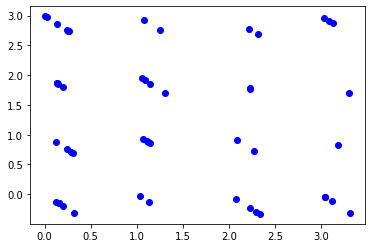

In [ ]:
plt.plot(data100.fac_tipo+data100.jitter, data100.clusters-data100.jitter, 'ob')

In [ ]:
data['clusters'] = data100.clusters
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo,clusters
0,0,Masculino,24,teléfono,robo,0,0,0,1
1,23,Femenino,59,efectivo,robo,0,1,1,0
2,9,Femenino,71,personal,violencia,1,2,1,2
3,24,Masculino,23,formulario web,infracción,2,3,0,0
4,13,Masculino,40,personal,infracción,2,2,0,2


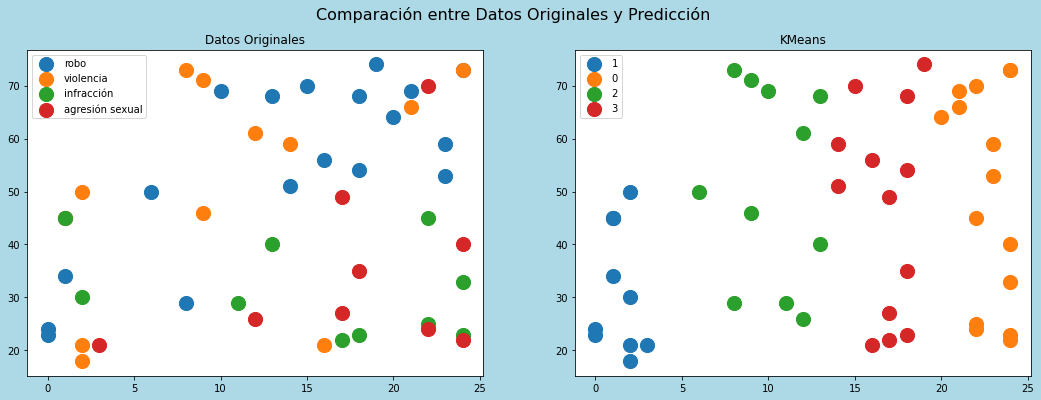

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='lightblue')

for item in data['tipo'].unique():
  datax = data[data['tipo'] == item]
  ax1.scatter(datax.hora, datax.edad, s=200, label=item)
  ax1.set_title('Datos Originales')
  ax1.legend()

for item in data['clusters'].unique():
  datax = data[data['clusters'] == item]
  ax2.scatter(datax.hora, datax.edad, s=200, label=item)
  ax2.set_title('KMeans')
  ax2.legend()

plt.suptitle('Comparación entre Datos Originales y Predicción', fontsize=16)
plt.show()

In [ ]:
modelo = DBSCAN(eps=0.1, min_samples=2)
modelo.fit(X)
modelo.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1,  3,  1, -1, -1, -1, -1, -1,  4, -1,
        3,  1, -1, -1, -1, -1,  2, -1, -1,  4, -1, -1,  0, -1, -1, -1])

In [ ]:
data['clust_dbscan'] = modelo.labels_
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo,clusters,clust_dbscan
0,0,Masculino,24,teléfono,robo,0,0,0,1,-1
1,23,Femenino,59,efectivo,robo,0,1,1,0,-1
2,9,Femenino,71,personal,violencia,1,2,1,2,-1
3,24,Masculino,23,formulario web,infracción,2,3,0,0,-1
4,13,Masculino,40,personal,infracción,2,2,0,2,-1


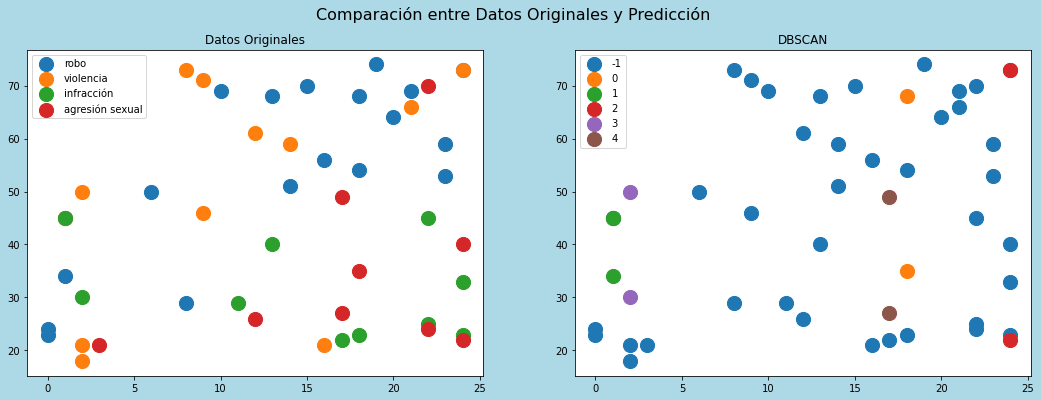

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='lightblue')

for item in data['tipo'].unique():
  datax = data[data['tipo'] == item]
  ax1.scatter(datax.hora, datax.edad, s=200, label=item)
  ax1.set_title('Datos Originales')
  ax1.legend()

for item in data['clust_dbscan'].unique():
  datax = data[data['clust_dbscan'] == item]
  ax2.scatter(datax.hora, datax.edad, s=200, label=item)
  ax2.set_title('DBSCAN')
  ax2.legend()

plt.suptitle('Comparación entre Datos Originales y Predicción', fontsize=16)
plt.show()